In [4]:
import pandas as pd

# Task 1: Load and Explore the Dataset
# 1. The Iris Dataset has been selected in .csv
# 2. Iris.csv has been loaded using pandas.

try:
    iris_df = pd.read_csv('Iris.csv')
    print(iris_df.head())
except FileNotFoundError:
    print("Error: The file 'iris.csv' was not found at the specified path.")

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
# 3. Display the first few rows of the dataset using .head() to inspect the data.
# We will check the data types of each column using the .dtypes attribute in pandas

print(iris_df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
# 4. Explore the structure of the dataset by checking the data types and any missing values.
# The .isnull() method checks for missing
# The .sum() method adds up all adds up all the missing values to give you a total count.

print(iris_df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# 6. Clean the dataset by either filling or dropping any missing values. 

# Check for missing values again before filling
print("Missing values before cleaning:")
print(iris_df.isnull().sum())

# Fill numerical missing values with the mean of their respective columns
for col in iris_df.columns[:-1]:  # Exclude the 'Species' column (categorical)
    if iris_df[col].dtype in ['float64', 'int64']:
        mean_value = iris_df[col].mean()
        iris_df[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in '{col}' with the mean: {mean_value:.2f}")

# For the 'Species' column (if there were any missing), you might choose to fill with the mode
# However, filling categorical missing values can be tricky and might introduce bias.
# A safer approach might be to drop rows with missing categorical values (see next section).
if iris_df['Species'].isnull().any():
    mode_Species = iris_df['Species'].mode()[0] # Get the first mode if multiple exist
    iris_df['Species'].fillna(mode_Species, inplace=True)
    print(f"Filled missing values in 'Species' with the mode: {mode_Species}")

print("\nMissing values after filling:")
print(iris_df.isnull().sum())

Missing values before cleaning:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Filled missing values in 'Id' with the mean: 75.50
Filled missing values in 'SepalLengthCm' with the mean: 5.84
Filled missing values in 'SepalWidthCm' with the mean: 3.05
Filled missing values in 'PetalLengthCm' with the mean: 3.76
Filled missing values in 'PetalWidthCm' with the mean: 1.20

Missing values after filling:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# 6. Clean the dataset by either filling or dropping any missing values. 

# Check for missing values again before dropping
print("Missing values before dropping:")
print(iris_df.isnull().sum())
print(f"Number of rows before dropping: {len(iris_df)}")

# Drop rows with any missing values
iris_df.dropna(inplace=True)

print("\nMissing values after dropping:")
print(iris_df.isnull().sum())
print(f"Number of rows after dropping: {len(iris_df)}")

Missing values before dropping:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Number of rows before dropping: 150

Missing values after dropping:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Number of rows after dropping: 150


In [12]:
# Task 2: Basic Data Analysis
# 1. Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().

# The .describe() method provides a range of summarised statistics on the data set.

print(iris_df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [14]:
# 2. Perform groupings on a categorical column (for example, Species, region, or department) and compute the mean of a numerical column for each group.

# Group the DataFrame by the 'Species' column and calculate the mean of each numerical column
Species_mean = iris_df.groupby('Species').mean()

# Print the results
print(Species_mean)

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [15]:
# 3. Identify any patterns or interesting findings from your analysis.

# The petal length and width is increasing progressively with each species.

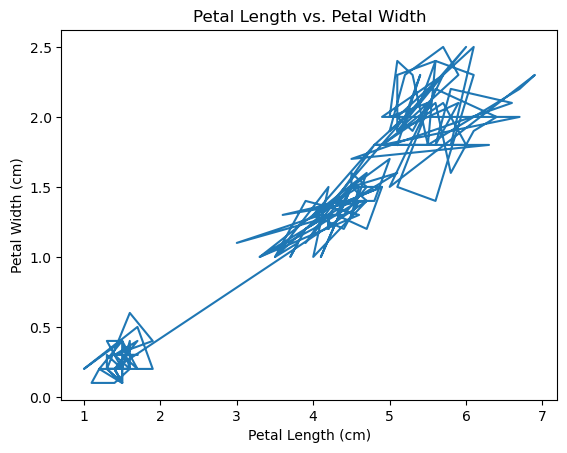

In [16]:
# Task 3: Data Visualisation
# 1. Create at least four different types of visualisations:
# -Line chart showing trends over time (for example, a time-series of sales data).
# We use a line graph to compare petal length and petal width. Because the Iris data is not time-based it does not suit visualisation using a line graph

import matplotlib.pyplot as plt

# Create the line chart
plt.plot(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'])

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width')

# Show the plot
plt.show()


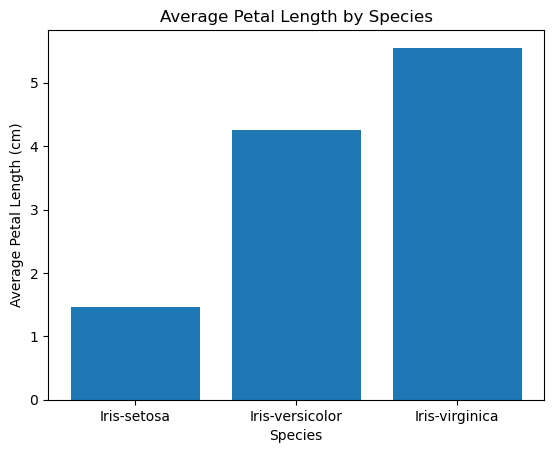

In [22]:
# -Bar chart showing the comparison of a numerical value across categories (e.g., average petal length per species).

# Calculate the average petal length for each species (if you haven't already)
avg_petal_length = iris_df.groupby('Species')['PetalLengthCm'].mean()

# Create the bar chart
plt.bar(avg_petal_length.index, avg_petal_length.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.title('Average Petal Length by Species')

# Show the plot
plt.show()

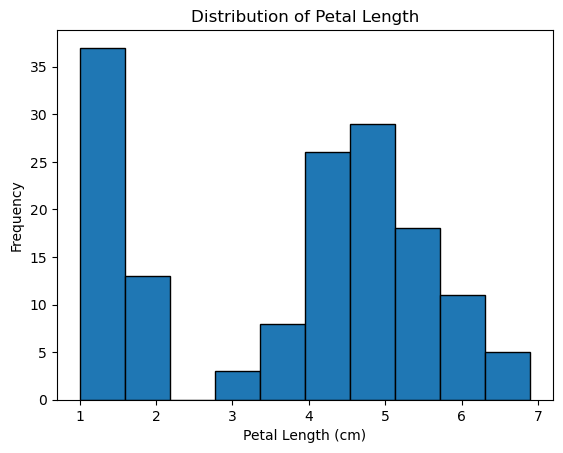

In [23]:
# Histogram of a numerical column to understand its distribution.

# First, find the correct column name by running: print(iris_df.columns)
petal_length_column = 'PetalLengthCm'  # Replace this with the actual column name!

# Create the histogram
plt.hist(iris_df[petal_length_column], bins=10, edgecolor='black')  # You can adjust 'bins'

# Add labels and title
plt.xlabel('Petal Length (cm)')  # Adjust label if needed
plt.ylabel('Frequency')
plt.title('Distribution of Petal Length')

# Show the plot
plt.show()

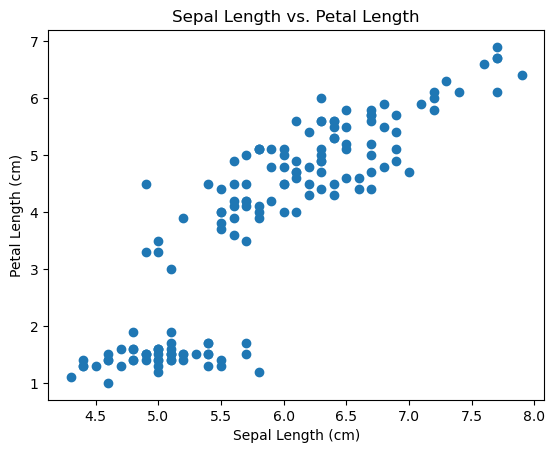

In [27]:
# -Scatter plot to visualise the relationship between two numerical columns (e.g., sepal length vs. petal length).

# Create the scatter plot
plt.scatter(iris_df['SepalLengthCm'], iris_df['PetalLengthCm'])

# Add labels and title
plt.xlabel('Sepal Length (cm)')  # Adjust label if needed
plt.ylabel('Petal Length (cm)')  # Adjust label if needed
plt.title('Sepal Length vs. Petal Length')

# Show the plot
plt.show()